# Assignment 
Build a multiple linear regression model for the prediction of demand for shared bikes

# Problem Statement
Company want to understand the factors affecting the demand for the shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands
3. Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:
Company required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# Interpretation of Data
1) Reading/understanding/Visualising the data
2) Preparing the data for modelling
3) Training the model
4) Residual analysis
5) Prediction and Evaluation on the test data


In [1028]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')



# Step 1 - Reading and Understanding the Data

In [1029]:
df =  pd.read_csv("day.csv")
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [1030]:
df.shape

(730, 16)

In [1031]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1032]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1033]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1034]:
df.size

11680

In [1035]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [1036]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/18,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/18,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/18,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06/01/18,1,0,1,0,6,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07/01/18,1,0,1,0,0,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08/01/18,1,0,1,0,1,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09/01/18,1,0,1,0,2,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10/01/18,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Dropping columns

* Record Index
* dteday
* Casual and Registered


In [1037]:
df.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [1038]:
df.shape

(730, 12)

# Business Problem Statement 
Company required to model the demand for shared bikes with the available independent variables.

### Attributes Information
	- instant: record index  ---> Dropped
	- dteday : date ---> Dropped
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users ---> Dropped
	- registered: count of registered users ---> Dropped
	- cnt: count of total rental bikes including both casual and registered



In [1039]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [1040]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [1041]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1042]:
num_col = ["cnt", "temp", "atemp", "hum", "windspeed"]
cat_col = ["yr", "holiday", "workingday", "weathersit","season", "mnth", "weekday"]

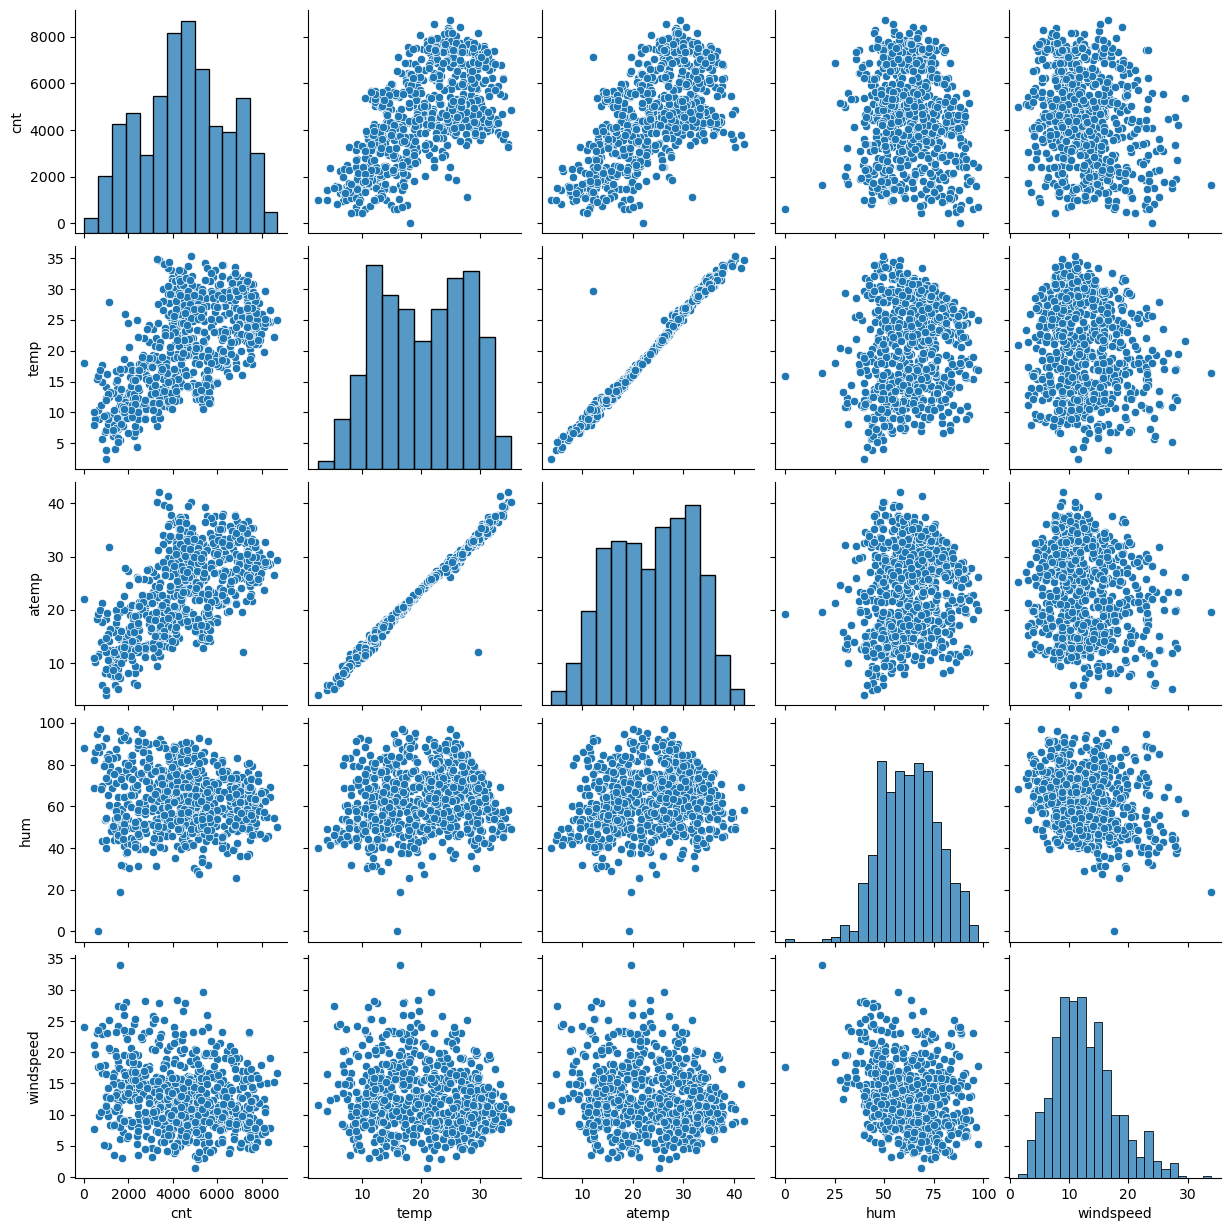

(0, 'yr')
(1, 'holiday')
(2, 'workingday')
(3, 'weathersit')
(4, 'season')
(5, 'mnth')
(6, 'weekday')


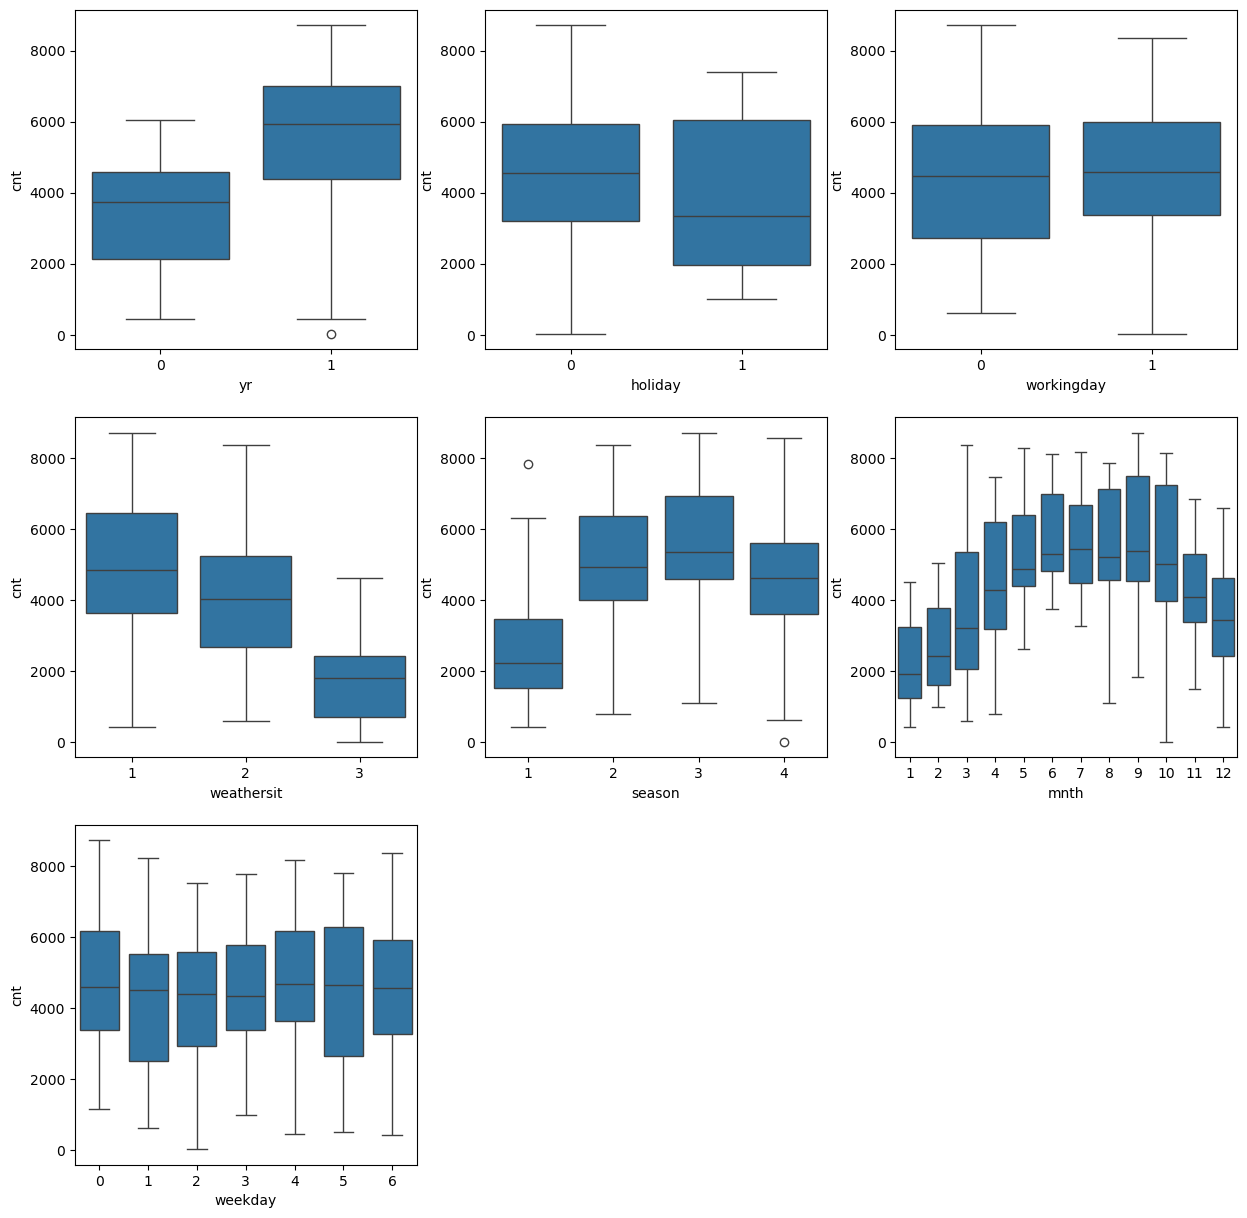

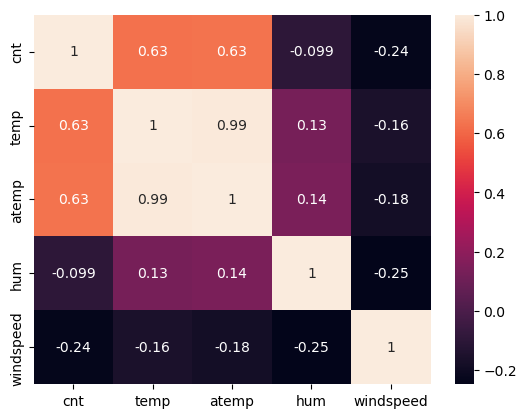

In [1043]:
# Univariate Analysis
sns.pairplot(df[num_col])  # numerical - histplot  #categorical - countplot
plt.show()

# Bivariate Analysis     #numerical vs numerical - scatter plot  #categorical vs numerical - boxplot 
# plt.figure(figsize=(12,20))  
# plt.subplot(2,3,1)
# sns.boxplot(x="yr", y="cnt", data = df)

# plt.subplot(2,3,2)
# sns.boxplot(x="holiday", y="cnt", data = df)

# plt.subplot(2,3,3)
# sns.boxplot(x="workingday", y="cnt", data = df)

# plt.subplot(2,3,4)
# sns.boxplot(x="weathersit", y="cnt", data = df)

# plt.subplot(2,3,5)
# sns.boxplot(x="season", y="cnt", data = df)

# plt.subplot(2,3,6)
# sns.boxplot(x="mnth", y="cnt", data = df) 
# plt.show()

plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    print(i)
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

# Multivariate Analysis
sns.heatmap(df[num_col].corr(), annot=True )
plt.show()

### When Correlation between two features is 1 and -1  it indicates high similarity and and dropping one of the highly correlated features is advisable for several reasons:

* Redundancy: Highly correlated features convey the same information, leading to redundancy. Including both may not provide additional benefits and can result in multicollinearity issues.
* Simplicity and Interpretability: A model with fewer features is simpler and more interpretable. Redundant features do not add value and can complicate the interpretation of the model’s behavior.
* Computational Efficiency: Training and running a model with fewer features are often computationally more efficient, particularly with large datasets.
* Avoiding Overfitting: Including highly correlated features may contribute to overfitting, where the model fits the training data too closely and struggles to generalize to new, unseen data.

#### Inferences:-
*  Temp and atemp are highly corelated hence we can take action to remove one of them as it can create Multicolinearity
* Temp and atemp also has high corelation with cnt variable

In [1044]:
# drop column atemp
df.drop(["atemp"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


## Analysis of Categorical Variable with Target Variable

In [1045]:
varlist = ['season', 'weekday', 'weathersit', 'mnth']

#df.season = df.season.apply(lambda x: x.map({ "1":"spring", "2":"summer", "3":"fall", "4":"winter"}))
df['season'] = df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['weathersit'] = df.weathersit.map({1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Rainy"})

# season_dum =  pd.get_dummies(df['season'], dtype=int, drop_first=True)  
# weekday_dum =  pd.get_dummies(df['weekday'], dtype=int, drop_first=True)  
# mnth_dum =  pd.get_dummies(df['mnth'], dtype=int, drop_first=True)  
# weathersit_dum =  pd.get_dummies(df['weathersit'], dtype=int, drop_first=True)  

In [1046]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Friday,1,Mist,10.420847,65.2917,23.458911,2114
726,spring,1,December,0,Saturday,1,Mist,10.386653,59.0000,10.416557,3095
727,spring,1,December,0,Sunday,0,Mist,10.386653,75.2917,8.333661,1341
728,spring,1,December,0,Monday,0,Clear,10.489153,48.3333,23.500518,1796


(0, 'yr')
(1, 'holiday')
(2, 'workingday')
(3, 'weathersit')
(4, 'season')
(5, 'mnth')
(6, 'weekday')


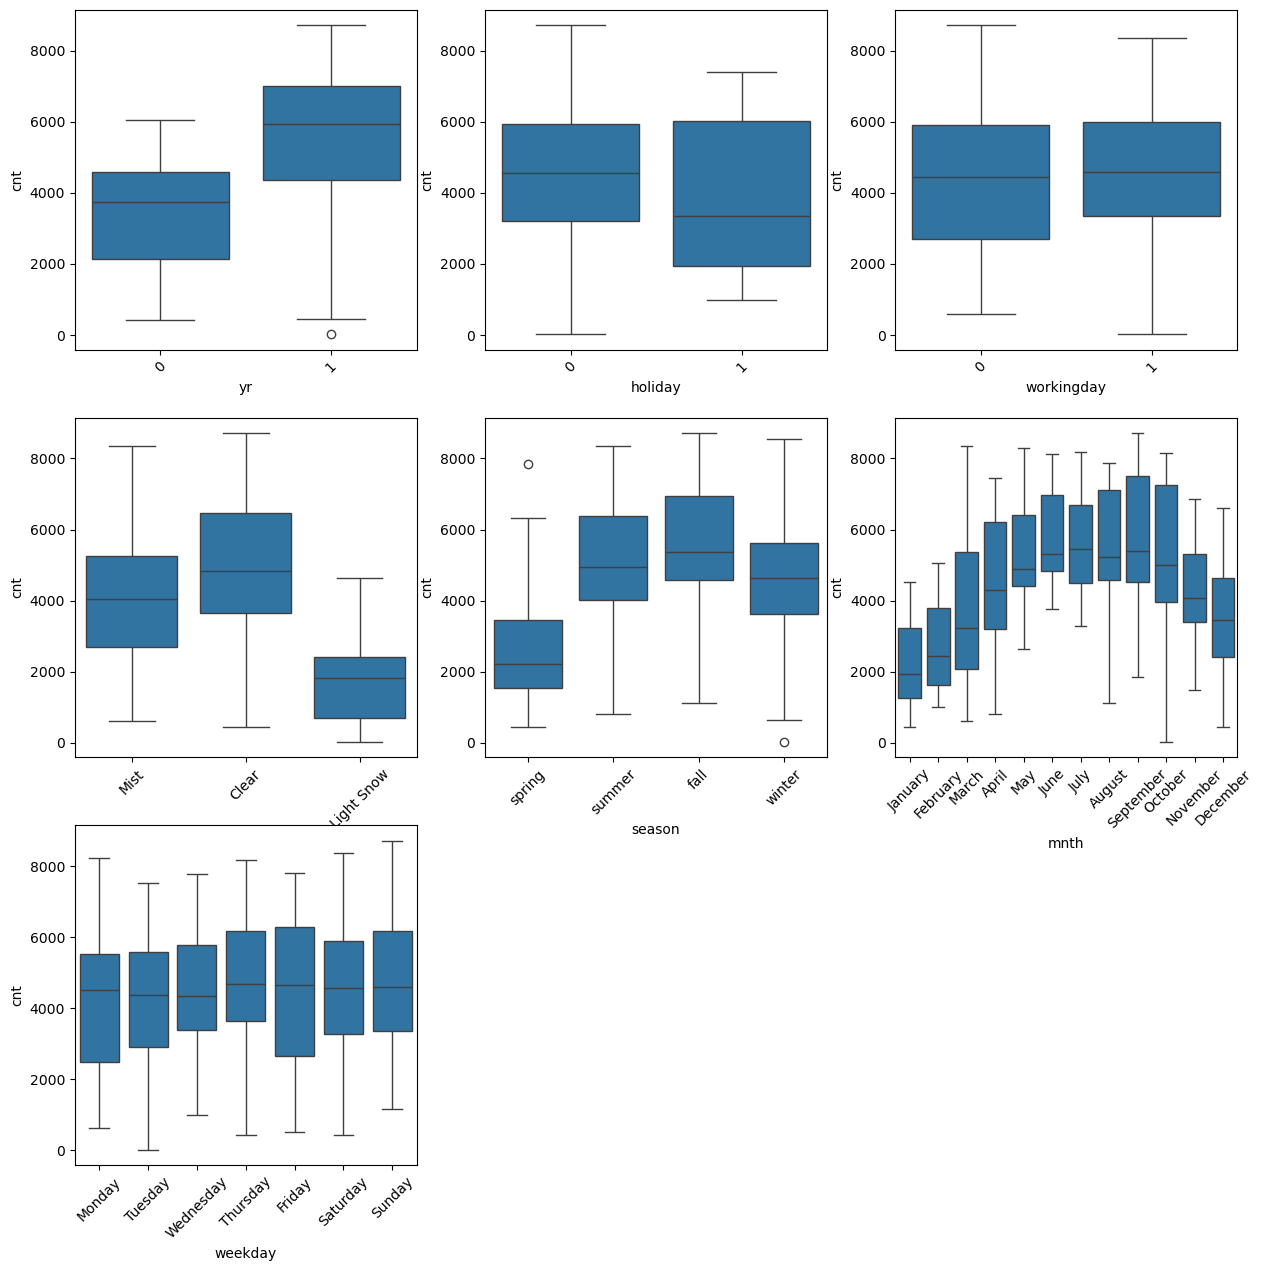

In [1047]:
# Box Plot to see categorical columns to see the deman for Bike Analysis

plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    print(i)
    plt.subplot(3,3,i[0]+1)
    a = sns.boxplot(data=df, x=i[1], y='cnt')
    a.set_xticklabels(a.get_xticklabels(), rotation=45)
plt.show()

Inferences: -
* Season 3 fall has the highest demand
* demand grown immediate next year
* demand continously growing each month till September
* demand in holiday is increased
* demand in clear climate is more
* Demand on Saturday is increased

#### Verifying with Regression plot that corealation obtained above for variables w.r.t cnt is correct

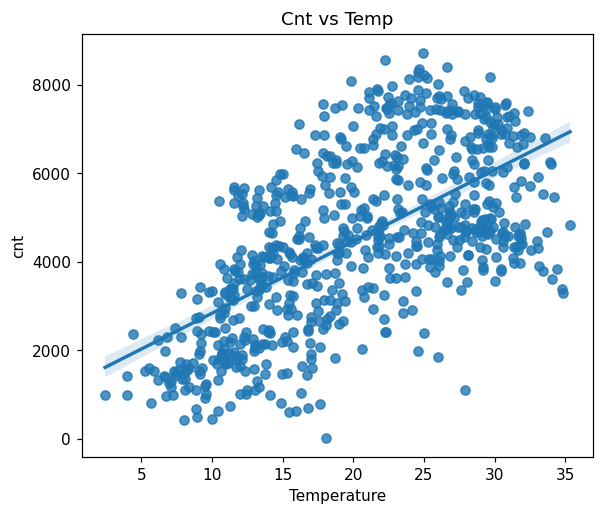

In [1048]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Temp")
sns.regplot(data=df,y="cnt", x= "temp")
plt.xlabel("Temperature")
plt.show()

Inferences :-
Demands for bikes is highy corelated to Temp
We can see count is linearly increasing as temperature increases

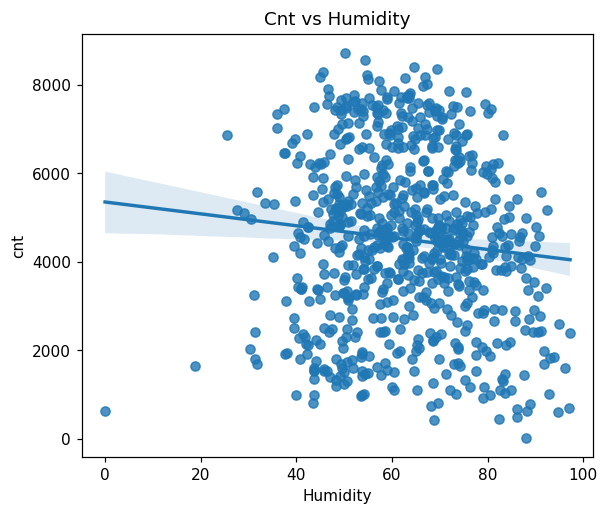

In [1049]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Humidity")
sns.regplot(data=df,y="cnt", x= "hum")
plt.xlabel("Humidity")
plt.show()

Inferences:-
Demands is decreasing as the humidity is increasing
Demand for bike is negativley corelated with Humidity

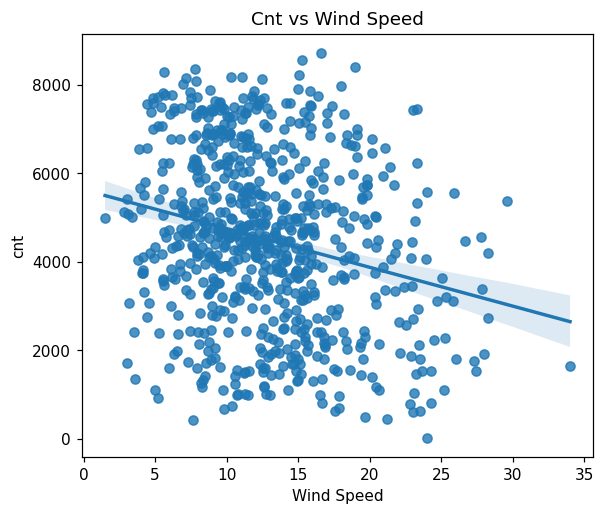

In [1050]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Wind Speed")
sns.regplot(data=df,y="cnt", x= "windspeed")
plt.xlabel("Wind Speed")
plt.show()

Inferences:-
Demands is decreasing as the windspeed is increasing
Demand for bike is negativley corelated with Windspeed

# Step 2 - Preparing the Data for Modelling
Encoding:-
 - Converting binary 1/0
 - Converting to dummy variables

### Create dummy variables for all Categorical Variables

In [1051]:
df_bikessharing =  pd.get_dummies(data=df,columns=varlist,drop_first= True, dtype=int)

In [1052]:
df_bikessharing.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1053]:
df_bikessharing.shape

(730, 29)

In [1054]:
df_bikessharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow',
       'weathersit_Mist', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September'],
      dtype='object')

# Step 3 - Model Building 
### Train-Test Split

In [1055]:
y = df_bikessharing.pop("cnt")
X = df_bikessharing

In [1056]:
X.shape

(730, 28)

In [1057]:
y.shape

(730,)

### Mixed Approach - Automated Approach and Step Wise Reducing Feature using VIF and P stats

In [1058]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=100)

In [1059]:
y_train.shape

(510,)

In [1060]:
X_train.shape

(510, 28)

In [1061]:
X_test.shape

(220, 28)

In [1062]:
y_test.shape

(220,)

In [1063]:
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
576,1,0,1,29.246653,70.4167,11.083475,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,13.803347,72.9583,14.707907,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling

In [1064]:
X_train.columns = X_train.columns.astype('str')
X_test.columns =  X_test.columns.astype('str')

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [1065]:
X_train.dtype

dtype('float64')

In [1066]:
X_train

array([[ 0.98443485, -0.16173108,  0.69156407, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [ 0.98443485, -0.16173108, -1.44599761, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [ 0.98443485, -0.16173108, -1.44599761, ..., -0.30727935,
        -0.30344207, -0.29566881],
       ...,
       [-1.01581126, -0.16173108, -1.44599761, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [-1.01581126, -0.16173108,  0.69156407, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [ 0.98443485, -0.16173108,  0.69156407, ..., -0.30727935,
        -0.30344207, -0.29566881]])

In [1067]:
X_train_df = pd.DataFrame(X_train,columns= X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [1068]:
X_train_df.head(2)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,0.984435,-0.161731,0.691564,1.230870,0.515796,-0.331282,-0.566783,-0.572822,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,3.475187,-0.287754,-0.32969,-0.303442,-0.307279,-0.303442,-0.295669
1,0.984435,-0.161731,-1.445998,-0.421238,-0.070634,-0.386359,1.764342,-0.572822,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,-0.287754,-0.287754,3.03315,-0.303442,-0.307279,-0.303442,-0.295669


In [1069]:
X_test_df.head(2)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,-1.015811,6.183104,-1.445998,1.304506,0.047244,-1.395126,-0.566783,-0.572822,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,3.475187,-0.287754,-0.32969,-0.303442,-0.307279,-0.303442,-0.295669
1,0.984435,-0.161731,0.691564,1.612837,-0.276917,-0.985373,-0.566783,1.745743,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,-0.287754,3.475187,-0.32969,-0.303442,-0.307279,-0.303442,-0.295669


### Feature Selection - There are two methods Standaridization and MinMax, here we have used Standaridization

In [1070]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1071]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=20)

In [1072]:
selector = selector.fit(X_train, y_train)
print(selector.support_)

[ True  True False  True  True  True  True  True  True  True False False
 False  True False  True  True  True  True  True  True  True False False
  True  True False  True]


In [1073]:
selected_features = X_train_df.columns[selector.support_]
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weekday_Monday', 'weekday_Tuesday',
       'weathersit_Light Snow', 'weathersit_Mist', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_May', 'mnth_November', 'mnth_September'],
      dtype='object')

In [1074]:
X_train = X_train_df[selected_features]
X_test = X_test_df[selected_features]
X_train.head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,weekday_Tuesday,weathersit_Light Snow,weathersit_Mist,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_May,mnth_November,mnth_September
0,0.984435,-0.161731,1.230870,0.515796,-0.331282,-0.566783,-0.572822,-0.572822,-0.428129,-0.424918,-0.174078,-0.725911,-0.326023,-0.303442,-0.267261,-0.311086,3.475187,-0.303442,-0.307279,-0.295669
1,0.984435,-0.161731,-0.421238,-0.070634,-0.386359,1.764342,-0.572822,-0.572822,-0.428129,-0.424918,-0.174078,1.377580,-0.326023,-0.303442,-0.267261,-0.311086,-0.287754,-0.303442,-0.307279,-0.295669


### Modelling

In [1075]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [1076]:
X_train_sm.shape

(510, 21)

In [1077]:
X_test_sm.shape

(220, 21)

In [1078]:
y_train.shape

(510,)

In [1079]:
X_train_sm.dtypes

const                    float64
yr                       float64
holiday                  float64
temp                     float64
hum                      float64
windspeed                float64
season_spring            float64
season_summer            float64
season_winter            float64
weekday_Monday           float64
weekday_Tuesday          float64
weathersit_Light Snow    float64
weathersit_Mist          float64
mnth_August              float64
mnth_December            float64
mnth_February            float64
mnth_January             float64
mnth_July                float64
mnth_May                 float64
mnth_November            float64
mnth_September           float64
dtype: object

In [1080]:
y_train.dtypes

dtype('int64')

### Model 1

In [1081]:
model1 = sm.OLS(np.array(y_train), X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.9
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.18e-186
Time:                        00:31:49   Log-Likelihood:                -4104.1
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     489   BIC:                             8339.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.196    131.165      0.000    4418.148    4552.527
yr                     1004.6783     34.917     28.773      0.000     936.072    1073.284
holiday                -122.9016     34.918     -3.520      0.000    -191.509     -54.295
temp                    883.9289     75.789     11.663      0.000     735.018    1032.840
hum                    -202.2901     48.028     -4.212      0.000    -296.657    -107.923
windspeed              -269.0788     37.843     -7.110      0.000    -343.433    -194.724
season_spring          -159.2820     99.837     -1.595      0.111    -355.444      36.880
season_summer           162.8739     87.757      1.856      0.064      -9.553     335.301
season_winter           418.4045     85.505      4.893      0.000     250.402     586.407
weekday_Monday          -82.0686     35.079     -2.340      0.020    -150.993     -13.144
weekday_Tuesday         -85.3839     35.174     -2.427      0.016    -154.495     -16.273
weathersit_Light Snow  -367.3095     38.675     -9.497      0.000    -443.299    -291.320
weathersit_Mist        -235.1856     42.927     -5.479      0.000    -319.529    -150.842
mnth_August              48.4658     60.853      0.796      0.426     -71.100     168.031
mnth_December          -111.8116     44.180     -2.531      0.012    -198.618     -25.006
mnth_February           -81.7478     46.733     -1.749      0.081    -173.570      10.074
mnth_January           -159.2155     52.718     -3.020      0.003    -262.797     -55.634
mnth_July               -83.6789     57.244     -1.462      0.144    -196.153      28.796
mnth_May                 49.5046     42.071      1.177      0.240     -33.158     132.167
mnth_November          -109.6531     46.297     -2.368      0.018    -200.619     -18.687
mnth_September          200.2344     50.941      3.931      0.000     100.144     300.324
==============================================================================
Omnibus:                       73.579   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.004
Skew:                          -0.721   Prob(JB):                     1.23e-42
Kurtosis:                       5.646   Cond. No.                         7.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1082]:
res1.params

const                    4485.337255
yr                       1004.678335
holiday                  -122.901608
temp                      883.928880
hum                      -202.290081
windspeed                -269.078808
season_spring            -159.282033
season_summer             162.873893
season_winter             418.404505
weekday_Monday            -82.068553
weekday_Tuesday           -85.383886
weathersit_Light Snow    -367.309469
weathersit_Mist          -235.185627
mnth_August                48.465800
mnth_December            -111.811620
mnth_February             -81.747816
mnth_January             -159.215528
mnth_July                 -83.678881
mnth_May                   49.504550
mnth_November            -109.653051
mnth_September            200.234382
dtype: float64

In [1083]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.042598
2,holiday,1.042629
3,temp,4.911899
4,hum,1.972568
5,windspeed,1.224642
6,season_spring,8.523576
7,season_summer,6.585743
8,season_winter,6.252077
9,weekday_Monday,1.052313


We could have 
 
 - High P-values , high VIF
 - High - Low
    - High P , Low VIF -- remove these first
    - Low P, High VIF  -- remove these after the ones above

 - Low P, Low VIF   

In [1084]:
X_train_sm = X_train_sm.drop("mnth_August", axis=1)
X_test_sm = X_test_sm.drop("mnth_August", axis=1)

Inferences - When there is high P and Low VIF, we need to remove first these
* mnth_August has high P-stats
* R2 and adjusted R2 are similar and good i.e. 84% 

### Model 2

In [1085]:
model2 = sm.OLS(np.array(y_train), X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.45e-187
Time:                        00:31:49   Log-Likelihood:                -4104.4
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     490   BIC:                             8334.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.184    131.214      0.000    4418.173    4552.502
yr                     1005.4929     34.889     28.820      0.000     936.942    1074.043
holiday                -123.5169     34.896     -3.540      0.000    -192.081     -54.953
temp                    888.3845     75.554     11.758      0.000     739.936    1036.833
hum                    -200.6082     47.964     -4.183      0.000    -294.848    -106.368
windspeed              -269.3307     37.827     -7.120      0.000    -343.654    -195.007
season_spring          -204.3238     82.243     -2.484      0.013    -365.917     -42.731
season_summer           114.9652     63.873      1.800      0.072     -10.534     240.464
season_winter           376.4821     67.358      5.589      0.000     244.137     508.827
weekday_Monday          -81.2637     35.052     -2.318      0.021    -150.134     -12.394
weekday_Tuesday         -85.9997     35.152     -2.446      0.015    -155.068     -16.932
weathersit_Light Snow  -368.8220     38.614     -9.552      0.000    -444.691    -292.952
weathersit_Mist        -233.8725     42.879     -5.454      0.000    -318.122    -149.623
mnth_December          -114.0590     44.073     -2.588      0.010    -200.655     -27.463
mnth_February           -81.7255     46.715     -1.749      0.081    -173.513      10.062
mnth_January           -159.1832     52.698     -3.021      0.003    -262.725     -55.641
mnth_July              -114.7574     41.867     -2.741      0.006    -197.019     -32.496
mnth_May                 48.4749     42.036      1.153      0.249     -34.118     131.068
mnth_November          -112.6262     46.129     -2.442      0.015    -203.262     -21.990
mnth_September          174.7324     39.605      4.412      0.000      96.917     252.548
==============================================================================
Omnibus:                       74.663   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.519
Skew:                          -0.732   Prob(JB):                     3.50e-43
Kurtosis:                       5.657   Cond. No.                         5.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1086]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.041703
2,holiday,1.042118
3,temp,4.885136
4,hum,1.968755
5,windspeed,1.224556
6,season_spring,5.788535
7,season_summer,3.491443
8,season_winter,3.882750
9,weekday_Monday,1.051440


In [1087]:
res2.params

const                    4485.337255
yr                       1005.492861
holiday                  -123.516897
temp                      888.384467
hum                      -200.608179
windspeed                -269.330674
season_spring            -204.323766
season_summer             114.965190
season_winter             376.482143
weekday_Monday            -81.263719
weekday_Tuesday           -85.999666
weathersit_Light Snow    -368.821960
weathersit_Mist          -233.872458
mnth_December            -114.058955
mnth_February             -81.725459
mnth_January             -159.183172
mnth_July                -114.757417
mnth_May                   48.474945
mnth_November            -112.626198
mnth_September            174.732394
dtype: float64

Inferences - When there is high P and Low VIF, we need to remove first these
* mnth_May has high P-stats
* R2 and adjusted R2 are similar and good i.e. 84% 

In [1088]:
X_train_sm = X_train_sm.drop("mnth_May", axis=1)
X_test_sm = X_test_sm.drop("mnth_May", axis=1)

### Model 3

In [1089]:
model3 = sm.OLS(np.array(y_train), X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          3.77e-188
Time:                        00:31:49   Log-Likelihood:                -4105.1
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     491   BIC:                             8329.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.195    131.169      0.000    4418.151    4552.524
yr                     1003.3122     34.849     28.790      0.000     934.840    1071.785
holiday                -124.5720     34.896     -3.570      0.000    -193.135     -56.009
temp                    903.6024     74.417     12.142      0.000     757.387    1049.818
hum                    -193.5954     47.593     -4.068      0.000    -287.106    -100.085
windspeed              -271.4539     37.795     -7.182      0.000    -345.714    -197.194
season_spring          -191.9314     81.566     -2.353      0.019    -352.192     -31.671
season_summer           147.2000     57.451      2.562      0.011      34.319     260.081
season_winter           383.2999     67.120      5.711      0.000     251.422     515.178
weekday_Monday          -82.9293     35.034     -2.367      0.018    -151.764     -14.095
weekday_Tuesday         -87.0559     35.152     -2.477      0.014    -156.123     -17.988
weathersit_Light Snow  -371.2727     38.568     -9.626      0.000    -447.052    -295.493
weathersit_Mist        -234.6573     42.888     -5.471      0.000    -318.924    -150.391
mnth_December          -111.2404     44.020     -2.527      0.012    -197.732     -24.749
mnth_February           -79.0874     46.675     -1.694      0.091    -170.795      12.620
mnth_January           -155.5855     52.623     -2.957      0.003    -258.980     -52.191
mnth_July              -115.5865     41.875     -2.760      0.006    -197.863     -33.310
mnth_November          -109.0828     46.042     -2.369      0.018    -199.547     -18.618
mnth_September          174.7288     39.618      4.410      0.000      96.887     252.570
==============================================================================
Omnibus:                       73.404   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.627
Skew:                          -0.735   Prob(JB):                     1.34e-40
Kurtosis:                       5.546   Cond. No.                         5.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences - When there is high P and Low VIF, we need to remove first these
* mnth_February has high P-stats
* R2 and adjusted R2 are similar and good i.e. 84% 

In [1090]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.038643
2,holiday,1.041402
3,temp,4.736104
4,hum,1.937107
5,windspeed,1.221655
6,season_spring,5.689707
7,season_summer,2.822759
8,season_winter,3.852837
9,weekday_Monday,1.049655


In [1091]:
res3.params

const                    4485.337255
yr                       1003.312158
holiday                  -124.571973
temp                      903.602370
hum                      -193.595416
windspeed                -271.453927
season_spring            -191.931382
season_summer             147.200027
season_winter             383.299935
weekday_Monday            -82.929265
weekday_Tuesday           -87.055898
weathersit_Light Snow    -371.272738
weathersit_Mist          -234.657252
mnth_December            -111.240393
mnth_February             -79.087442
mnth_January             -155.585478
mnth_July                -115.586451
mnth_November            -109.082800
mnth_September            174.728779
dtype: float64

In [1092]:
X_train_sm = X_train_sm.drop("mnth_February", axis=1)
X_test_sm = X_test_sm.drop("mnth_February", axis=1)

### Model 4

In [1093]:
model4 = sm.OLS(np.array(y_train), X_train_sm)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.21e-188
Time:                        00:31:49   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     492   BIC:                             8325.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.260    130.921      0.000    4418.023    4552.651
yr                     1001.7102     34.903     28.700      0.000     933.133    1070.287
holiday                -127.8487     34.908     -3.662      0.000    -196.436     -59.261
temp                    935.6516     72.110     12.975      0.000     793.970    1077.333
hum                    -196.2037     47.658     -4.117      0.000    -289.842    -102.565
windspeed              -269.6699     37.852     -7.124      0.000    -344.042    -195.298
season_spring          -229.1534     78.701     -2.912      0.004    -383.785     -74.522
season_summer           159.9581     57.064      2.803      0.005      47.839     272.077
season_winter           390.0464     67.129      5.810      0.000     258.151     521.942
weekday_Monday          -80.9963     35.082     -2.309      0.021    -149.925     -12.068
weekday_Tuesday         -87.5719     35.218     -2.487      0.013    -156.768     -18.376
weathersit_Light Snow  -369.2059     38.622     -9.559      0.000    -445.091    -293.321
weathersit_Mist        -233.3659     42.963     -5.432      0.000    -317.779    -148.953
mnth_December           -88.5109     42.006     -2.107      0.036    -171.045      -5.977
mnth_January           -107.4599     44.385     -2.421      0.016    -194.667     -20.253
mnth_July              -117.9064     41.932     -2.812      0.005    -200.295     -35.518
mnth_November           -96.9920     45.573     -2.128      0.034    -186.533      -7.451
mnth_September          178.4405     39.632      4.502      0.000     100.571     256.310
==============================================================================
Omnibus:                       68.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.059
Skew:                          -0.691   Prob(JB):                     1.18e-37
Kurtosis:                       5.468   Cond. No.                         5.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1094]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.037878
2,holiday,1.038203
3,temp,4.430142
4,hum,1.935080
5,windspeed,1.220707
6,season_spring,5.277011
7,season_summer,2.774275
8,season_winter,3.839279
9,weekday_Monday,1.048542


In [1095]:
res4.params

const                    4485.337255
yr                       1001.710171
holiday                  -127.848723
temp                      935.651625
hum                      -196.203713
windspeed                -269.669877
season_spring            -229.153397
season_summer             159.958132
season_winter             390.046428
weekday_Monday            -80.996258
weekday_Tuesday           -87.571930
weathersit_Light Snow    -369.205932
weathersit_Mist          -233.365924
mnth_December             -88.510908
mnth_January             -107.459895
mnth_July                -117.906374
mnth_November             -96.992032
mnth_September            178.440498
dtype: float64

We could have 
 
 - High P-values , high VIF
 - High - Low
    - High P , Low VIF -- remove these first
    - Low P, High VIF  -- remove these after the ones above

 - Low P, Low VIF 

Inferences - End check is Low P and High VIF, we need to remove first these
* season_spring has high VIF
* R2 and adjusted R2 are similar and good i.e. 84% 

In [1096]:
X_train_sm = X_train_sm.drop("season_spring", axis=1)
X_test_sm = X_test_sm.drop("season_spring", axis=1)

### Model 5

In [1097]:
model5 = sm.OLS(np.array(y_train), X_train_sm)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          6.01e-188
Time:                        00:31:49   Log-Likelihood:                -4111.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     493   BIC:                             8328.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.519    129.939      0.000    4417.515    4553.159
yr                      995.7886     35.107     28.365      0.000     926.811    1064.766
holiday                -132.3828     35.137     -3.768      0.000    -201.419     -63.346
temp                   1080.1941     52.697     20.498      0.000     976.655    1183.733
hum                    -211.1415     47.739     -4.423      0.000    -304.939    -117.344
windspeed              -282.0715     37.896     -7.443      0.000    -356.529    -207.614
season_summer           275.1000     41.451      6.637      0.000     193.658     356.542
season_winter           521.6775     49.999     10.434      0.000     423.439     619.916
weekday_Monday          -78.4553     35.336     -2.220      0.027    -147.883      -9.028
weekday_Tuesday         -89.4020     35.478     -2.520      0.012    -159.109     -19.695
weathersit_Light Snow  -360.1712     38.788     -9.286      0.000    -436.382    -283.960
weathersit_Mist        -221.5201     43.093     -5.141      0.000    -306.188    -136.852
mnth_December           -74.1504     42.031     -1.764      0.078    -156.732       8.431
mnth_January           -116.9302     44.600     -2.622      0.009    -204.559     -29.301
mnth_July               -94.6380     41.475     -2.282      0.023    -176.127     -13.149
mnth_November           -72.9126     45.155     -1.615      0.107    -161.632      15.807
mnth_September          213.6809     38.024      5.620      0.000     138.971     288.391
==============================================================================
Omnibus:                       60.116   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.203
Skew:                          -0.659   Prob(JB):                     1.45e-28
Kurtosis:                       5.073   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1098]:
res5.params

const                    4485.337255
yr                        995.788626
holiday                  -132.382791
temp                     1080.194147
hum                      -211.141523
windspeed                -282.071495
season_summer             275.099999
season_winter             521.677470
weekday_Monday            -78.455347
weekday_Tuesday           -89.402000
weathersit_Light Snow    -360.171225
weathersit_Mist          -221.520112
mnth_December             -74.150435
mnth_January             -116.930244
mnth_July                 -94.637951
mnth_November             -72.912578
mnth_September            213.680905
dtype: float64

In [1099]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [ variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.034355
2,holiday,1.036138
3,temp,2.330590
4,hum,1.912656
5,windspeed,1.205251
6,season_summer,1.441975
7,season_winter,2.098065
8,weekday_Monday,1.047893
9,weekday_Tuesday,1.056360


#### Inferences
*  mnth_November - High P and Low VIF Hence need to be dropped

In [1100]:
X_train_sm = X_train_sm.drop("mnth_November", axis=1)
X_test_sm = X_test_sm.drop("mnth_November", axis=1)

### Model 6

In [1101]:
model6 = sm.OLS(np.array(y_train), X_train_sm)
res6 = model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.61e-188
Time:                        00:31:50   Log-Likelihood:                -4112.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.575    129.728      0.000    4417.405    4553.269
yr                      995.7017     35.164     28.316      0.000     926.613    1064.791
holiday                -138.7758     34.970     -3.968      0.000    -207.484     -70.068
temp                   1095.4077     51.933     21.093      0.000     993.372    1197.444
hum                    -210.5030     47.815     -4.402      0.000    -304.449    -116.557
windspeed              -282.0679     37.958     -7.431      0.000    -356.646    -207.490
season_summer           279.3587     41.434      6.742      0.000     197.950     360.768
season_winter           480.5369     43.091     11.152      0.000     395.873     565.201
weekday_Monday          -78.1789     35.393     -2.209      0.028    -147.718      -8.640
weekday_Tuesday         -88.1750     35.528     -2.482      0.013    -157.979     -18.371
weathersit_Light Snow  -356.2580     38.776     -9.188      0.000    -432.443    -280.073
weathersit_Mist        -219.7934     43.150     -5.094      0.000    -304.573    -135.014
mnth_December           -48.0871     38.871     -1.237      0.217    -124.460      28.286
mnth_January           -106.4764     44.199     -2.409      0.016    -193.318     -19.635
mnth_July               -96.8907     41.519     -2.334      0.020    -178.466     -15.316
mnth_September          220.1948     37.871      5.814      0.000     145.786     294.603
==============================================================================
Omnibus:                       56.873   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.944
Skew:                          -0.636   Prob(JB):                     2.45e-26
Kurtosis:                       4.984   Cond. No.                         2.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1102]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [ variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.034352
2,holiday,1.022982
3,temp,2.256091
4,hum,1.912525
5,windspeed,1.205251
6,season_summer,1.436137
7,season_winter,1.553278
8,weekday_Monday,1.047868
9,weekday_Tuesday,1.055875


#### Inferences
*  mnth_December - High P and Low VIF Hence need to be dropped

In [1103]:
X_train_sm = X_train_sm.drop("mnth_December", axis=1)
X_test_sm = X_test_sm.drop("mnth_December", axis=1)

### Model 7

In [1104]:
model7 = sm.OLS(np.array(y_train), X_train_sm)
res7 = model7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.44e-189
Time:                        00:31:50   Log-Likelihood:                -4113.1
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     495   BIC:                             8320.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.593    129.659      0.000    4417.369    4553.305
yr                      995.2785     35.181     28.290      0.000     926.156    1064.401
holiday                -137.3831     34.971     -3.929      0.000    -206.092     -68.674
temp                   1114.0778     49.718     22.408      0.000    1016.394    1211.762
hum                    -216.3886     47.603     -4.546      0.000    -309.918    -122.859
windspeed              -278.6168     37.875     -7.356      0.000    -353.033    -204.201
season_summer           285.5585     41.152      6.939      0.000     204.704     366.413
season_winter           474.3394     42.822     11.077      0.000     390.205     558.474
weekday_Monday          -78.5635     35.410     -2.219      0.027    -148.137      -8.990
weekday_Tuesday         -86.7908     35.529     -2.443      0.015    -156.597     -16.984
weathersit_Light Snow  -351.8801     38.634     -9.108      0.000    -427.788    -275.972
weathersit_Mist        -216.7073     43.100     -5.028      0.000    -301.390    -132.025
mnth_January            -93.8728     43.032     -2.181      0.030    -178.420      -9.325
mnth_July               -98.6156     41.518     -2.375      0.018    -180.188     -17.043
mnth_September          223.5595     37.794      5.915      0.000     149.304     297.815
==============================================================================
Omnibus:                       54.548   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.476
Skew:                          -0.617   Prob(JB):                     6.21e-25
Kurtosis:                       4.930   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1105]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [ variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.034254
2,holiday,1.021922
3,temp,2.065560
4,hum,1.893590
5,windspeed,1.198740
6,season_summer,1.415127
7,season_winter,1.532284
8,weekday_Monday,1.047787
9,weekday_Tuesday,1.054828


In [1106]:
res7.params

const                    4485.337255
yr                        995.278486
holiday                  -137.383088
temp                     1114.077753
hum                      -216.388556
windspeed                -278.616769
season_summer             285.558498
season_winter             474.339442
weekday_Monday            -78.563529
weekday_Tuesday           -86.790795
weathersit_Light Snow    -351.880119
weathersit_Mist          -216.707323
mnth_January              -93.872766
mnth_July                 -98.615607
mnth_September            223.559497
dtype: float64

# Step 4 - Residual Analysis

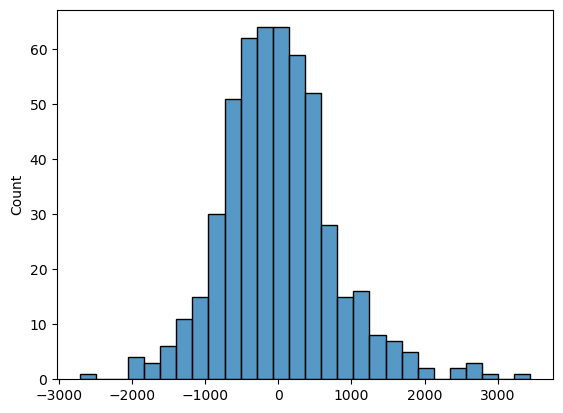

In [1107]:
#y_train_pred = model7.predict(X_train_sm)
sns.histplot(res7.predict(X_train_sm) - y_train.reset_index(drop=True))
plt.show()



# Step 5 - Predictions and Evaluation on Test Set
# fit() - Train
# transform() - Test

In [1108]:
res7.params

const                    4485.337255
yr                        995.278486
holiday                  -137.383088
temp                     1114.077753
hum                      -216.388556
windspeed                -278.616769
season_summer             285.558498
season_winter             474.339442
weekday_Monday            -78.563529
weekday_Tuesday           -86.790795
weathersit_Light Snow    -351.880119
weathersit_Mist          -216.707323
mnth_January              -93.872766
mnth_July                 -98.615607
mnth_September            223.559497
dtype: float64

In [1109]:
# predict
y_test_pred = res7.predict(X_test_sm)
y_test_pred

0      3475.017596
1      8125.990320
2      3560.046534
3      5327.439325
4      5529.079714
          ...     
215    6247.184074
216    4408.071618
217    7197.064432
218    2723.701289
219    6440.928594
Length: 220, dtype: float64

In [1110]:
# evaluate
from sklearn.metrics import r2_score
r2_score(y_true=y_test ,y_pred=y_test_pred)

0.80630237346982